In [4]:
import pandas as pd
import csv

### Examine Data

In [5]:
df = pd.read_csv('Amazon Data.csv')

In [6]:
df.drop(['Purchase Order Number','Shipping Address Street 2','Group Name', 'Payment Instrument Type','Ordering Customer Email','Shipping Address Name' ,'Shipping Address Street 1' ,'Shipping Address Street 2','Shipping Address City','Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number','Buyer Name', 'Group Name'], axis=1, inplace=True)
df.head()

,Order Date,Order ID,Website,Shipment Date,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,09/09/15,115-0475778-4183462,Amazon.com,09/10/15,$40.98,$0.00,$0.00,$0.00,$0.00,$40.98
1,09/26/15,115-5605263-2794612,Amazon.com,09/29/15,$65.00,$0.00,$3.90,$0.00,$3.90,$68.90
2,10/07/15,115-6002890-8113013,Amazon.com,10/07/15,$29.98,$7.98,$0.98,$0.00,$0.98,$38.94
3,10/08/15,115-3671305-3470660,Amazon.com,10/08/15,$17.99,$0.00,$0.00,$0.00,$0.00,$17.99
4,01/07/16,110-2733596-3163448,Amazon.com,01/07/16,$29.99,$0.00,$0.00,$0.00,$0.00,$29.99


In [7]:
df.columns

Index(['Order Date', 'Order ID', 'Website', 'Shipment Date', 'Subtotal',
       'Shipping Charge', 'Tax Before Promotions', 'Total Promotions',
       'Tax Charged', 'Total Charged'],
      dtype='object')

In [8]:
df.tail()

,Order Date,Order ID,Website,Shipment Date,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
312,01/09/23,111-3974465-4905043,Amazon.com,01/10/23,$49.99,$0.00,$4.44,$0.00,$4.44,$54.43
313,01/11/23,112-0570037-8683435,Amazon.com,01/11/23,$6.99,$2.99,$0.49,$0.00,$0.49,$10.47
314,01/12/23,111-9813024-2447424,Amazon.com,01/13/23,$79.99,$0.00,$4.76,$12.00,$4.76,$72.75
315,01/13/23,111-3400684-9606654,Amazon.com,01/14/23,$62.47,$0.00,$4.37,$0.00,$4.37,$66.84
316,01/14/23,111-8607441-6817063,Amazon.com,NaN,$47.99,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(317, 10)

In [10]:
df.isnull()

,Order Date,Order ID,Website,Shipment Date,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
312,False,False,False,False,False,False,False,False,False,False
313,False,False,False,False,False,False,False,False,False,False
314,False,False,False,False,False,False,False,False,False,False
315,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

Order Date               0
Order ID                 0
Website                  0
Shipment Date            1
Subtotal                 0
Shipping Charge          1
Tax Before Promotions    1
Total Promotions         1
Tax Charged              1
Total Charged            1
dtype: int64

In [12]:
df.dtypes

Order Date               object
Order ID                 object
Website                  object
Shipment Date            object
Subtotal                 object
Shipping Charge          object
Tax Before Promotions    object
Total Promotions         object
Tax Charged              object
Total Charged            object
dtype: object

### Clean Data

In [13]:
df = df.fillna(0)
df.tail()

,Order Date,Order ID,Website,Shipment Date,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
312,01/09/23,111-3974465-4905043,Amazon.com,01/10/23,$49.99,$0.00,$4.44,$0.00,$4.44,$54.43
313,01/11/23,112-0570037-8683435,Amazon.com,01/11/23,$6.99,$2.99,$0.49,$0.00,$0.49,$10.47
314,01/12/23,111-9813024-2447424,Amazon.com,01/13/23,$79.99,$0.00,$4.76,$12.00,$4.76,$72.75
315,01/13/23,111-3400684-9606654,Amazon.com,01/14/23,$62.47,$0.00,$4.37,$0.00,$4.37,$66.84
316,01/14/23,111-8607441-6817063,Amazon.com,0,$47.99,0,0,0,0,0


In [14]:
cols = ['Subtotal', 'Shipping Charge',
       'Tax Before Promotions', 'Total Promotions', 'Tax Charged',
       'Total Charged']

for col in df[cols]:
    df[col] = (df[col].astype(str).str.replace('$','', regex=True).astype(float))
df.tail()

,Order Date,Order ID,Website,Shipment Date,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
312,01/09/23,111-3974465-4905043,Amazon.com,01/10/23,49.99,0.00,4.44,0.0,4.44,54.43
313,01/11/23,112-0570037-8683435,Amazon.com,01/11/23,6.99,2.99,0.49,0.0,0.49,10.47
314,01/12/23,111-9813024-2447424,Amazon.com,01/13/23,79.99,0.00,4.76,12.0,4.76,72.75
315,01/13/23,111-3400684-9606654,Amazon.com,01/14/23,62.47,0.00,4.37,0.0,4.37,66.84
316,01/14/23,111-8607441-6817063,Amazon.com,0,47.99,0.00,0.00,0.0,0.00,0.00


###  Calculating the Total Amount of Money Spent on Amazon

In [15]:
df['Total Charged'].sum()

14197.030000000002

In [16]:
df['Total Charged'].mean()

44.785583596214494

In [17]:
df['Total Charged'].median()

24.99

In [18]:
df['Total Charged'].max()

845.39

In [19]:
df["Tax Charged"].sum()

578.12

In [20]:
df["Tax Charged"].sum() / df['Total Charged'].sum() * 100

4.072119309461204

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Order ID,Website,Shipment Date,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,2015-09-09,115-0475778-4183462,Amazon.com,09/10/15,40.98,0.00,0.00,0.0,0.00,40.98
1,2015-09-26,115-5605263-2794612,Amazon.com,09/29/15,65.00,0.00,3.90,0.0,3.90,68.90
2,2015-10-07,115-6002890-8113013,Amazon.com,10/07/15,29.98,7.98,0.98,0.0,0.98,38.94
3,2015-10-08,115-3671305-3470660,Amazon.com,10/08/15,17.99,0.00,0.00,0.0,0.00,17.99
4,2016-01-07,110-2733596-3163448,Amazon.com,01/07/16,29.99,0.00,0.00,0.0,0.00,29.99


### Visualize Data

<AxesSubplot:xlabel='Order Date'>

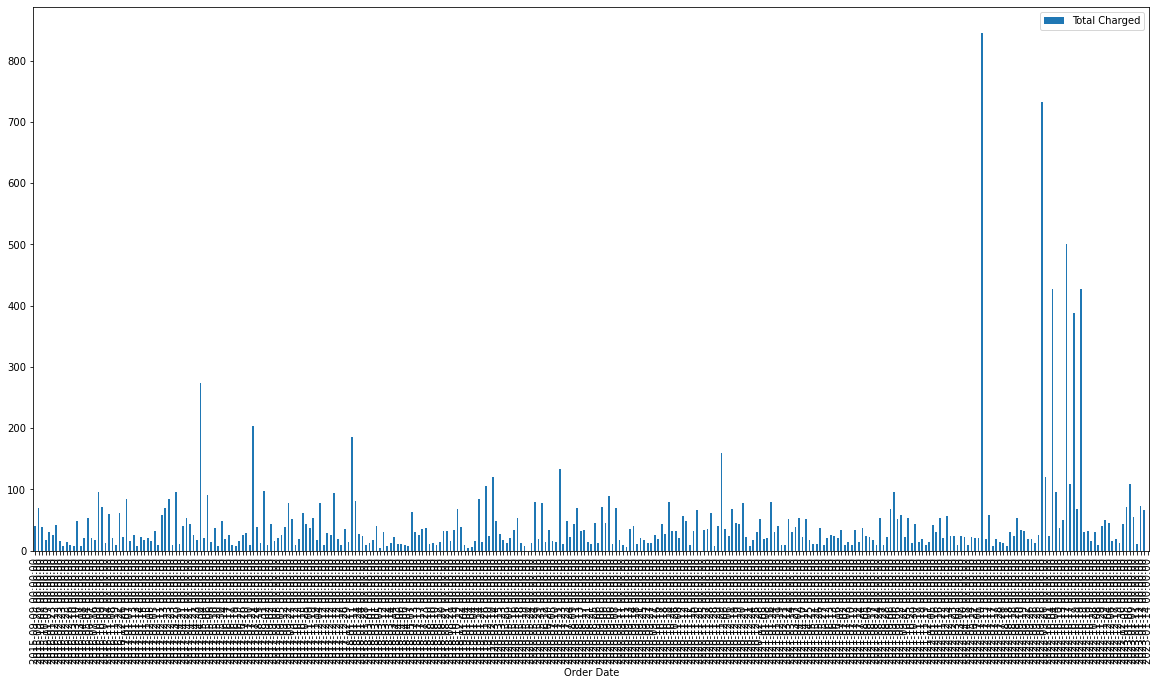

In [22]:
df.plot.bar(x = 'Order Date', y = 'Total Charged', rot = 90, figsize=(20,10))

In [23]:
daily_orders = df.groupby('Order Date').sum()['Total Charged']
daily_orders.head()

Order Date
2015-09-09    40.98
2015-09-26    68.90
2015-10-07    38.94
2015-10-08    17.99
2016-01-07    29.99
Name: Total Charged, dtype: float64

<AxesSubplot:xlabel='Order Date'>

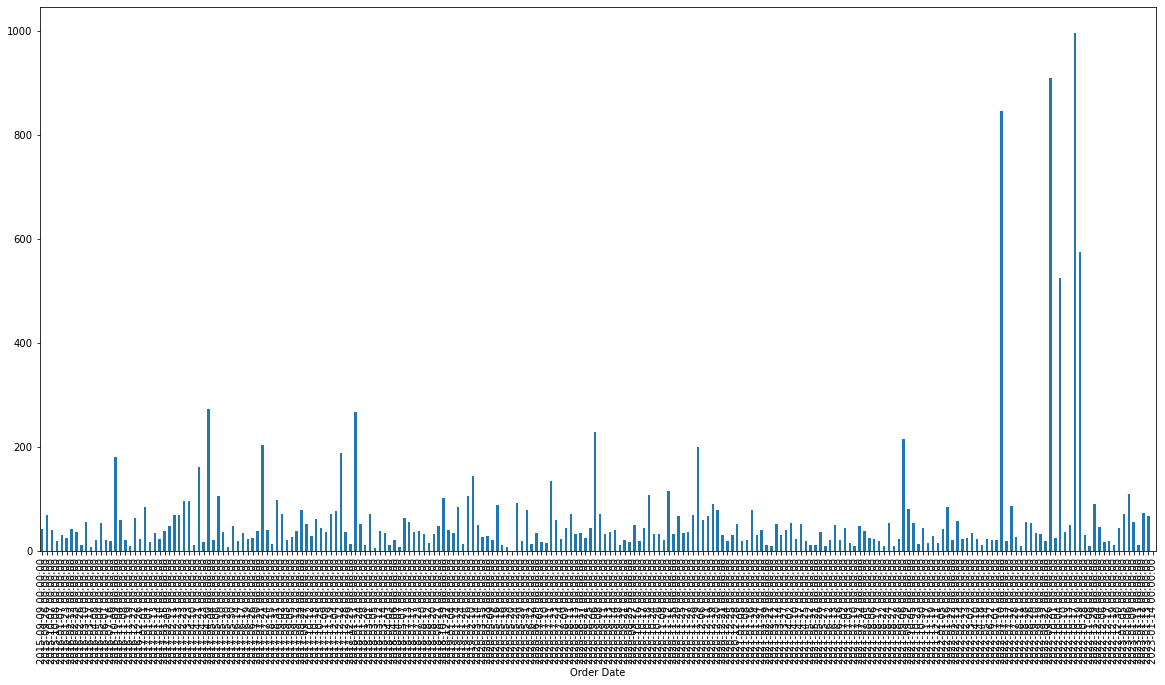

In [24]:
daily_orders.plot.bar(figsize=(20,10))

In [25]:
yearly_orders = df.groupby(df['Order Date'].dt.year).sum()['Total Charged']
yearly_orders

Order Date
2015     166.81
2016     671.01
2017    2578.88
2018     970.93
2019     382.40
2020    2698.96
2021    1406.03
2022    4937.36
2023     384.65
Name: Total Charged, dtype: float64

<AxesSubplot:xlabel='Order Date'>

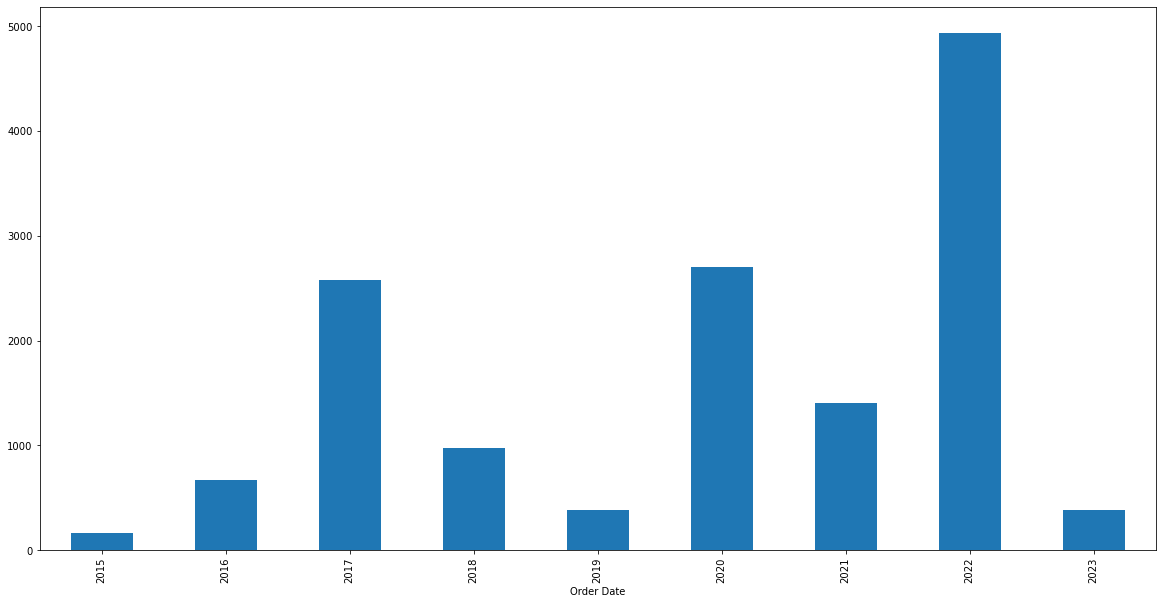

In [26]:
yearly_orders.plot.bar(figsize=(20,10))

### Insights

1. The Total Amount Spent on Amazon.com is **$ 14,197.03**.

2. The Average Average order cost amounts to **$44.79**.

3. The Median order cost amounts amounts to **$24.99**.

4. The Most money spent on an order amounts to **$845.39**.

5. The total spent in sales tax is **578.12**.

6. Overall effective sales tax rate is **4.07%**.

7. 2022 We Spent the most amount of money on amazon at **$4,937.36**

8. 2015 We spent the least amount of money on amazon at **$166.81**